# Case Study 1: Diamonds

In this lesson, we're going to do some basic data analyses on a set of diamond characteristics and prices. 

In [ ]:
import os
my_dir = os.getcwd() # get current working directory
my_dir

You should see something like `'/home/user/work/DIBS_materials/python'`. Make sure it ends with `/DIBS_materials/python`.

In [ ]:
!mkdir data # make directory called "data"
target_dir = os.path.join(my_dir, 'data/')
!wget -P "$target_dir" "https://people.duke.edu/~jmp33/dibs/minerals.csv" # download csv to data folder

# if this doesn't work, manually download `minerals.csv` from https://people.duke.edu/~jmp33/dibs/ 
# to your local machine, and upload it to `data` folder

If you open the file in a text editor, you will see that it consists of a bunch of lines, each with a bunch of commas. This is a csv or "comma-separated value" file. Every row represents a record (like a row in a spreadsheet), with each cell separated by a comma. The first row has the same format, but the entries are the names of the columns.

# Loading the data

We would like to load this data into Python. But to do so, we will need to tell Python that we want to get some tools ready. These tools are located in a library (the Python term is "module") called Pandas. So we do this:

In [1]:
import pandas as pd

This tells Python to load the `pandas` module and nickname it `pd`. Then, whenever we want to use functionality from `pandas`, we do so by giving the address of the function we want. In this case, we want to load data from a csv file, so we call the function `read_csv`:

In [2]:
# we can include comments like this

# note that for the following to work, you will need to be running the notebook from a folder
# with a subdirectory called data that has the minerals.csv file inside
data = pd.read_csv('data/minerals.csv')

Let's read from the left:

`data =` 

tells Python that we want to do something (on the right hand side of the equation) and assign its output to a variable called `data`. We could have called it `duck` or `shotput` or `harmony`, but we want to give our variables meaningful names, and in cases where we are only going to be exploring a single dataset, it's convenient to name it the obvious thing.

On the right hand side, we're doing several things:
- We're telling Python to look in the `pandas` module (nicknamed `pd`)
- We telling Python to call a function named `read_csv` that's found there (we will find that looking up functions in modules is a lot like looking up files in directories)
- We're giving the function the (local) path to the file in quotes

We will see this pattern repeatedly in Python. We use names like `read_csv` to tell Python to perform actions. In parentheses, we will supply variables or pieces of information needed as inputs by Python to perform those actions. The actions are called functions (related to the idea of functions in math, which are objects that take inputs and produce an output), and the pieces of information inside parentheses are called "arguments." Much more on all of this later.

# Examining the data

So what did we accomplish?

The easiest way to see is by asking Python to print the variable to the screen. We can do this with

In [3]:
print(data)

        item shape  carat cut color clarity polish symmetry  depth  table  \
0          1    PS   0.28   F     F     SI2     VG        G   61.6   50.0   
1          2    PS   0.23   G     F     SI1     VG        G   67.5   51.0   
2          3    EC   0.34   G     I     VS2     VG       VG   71.6   65.0   
3          4    MQ   0.34   G     J     VS1      G        G   68.2   55.0   
4          5    PS   0.23   G     D     SI1     VG       VG   55.0   58.0   
5          6    MQ   0.23   F     G     VS2     VG        G   71.6   55.0   
6          7    RA   0.37   F     I     SI2      G        G   79.0   76.0   
7          8    EC   0.24  VG     E     SI1     VG       VG   68.6   65.0   
8          9    RD   0.24   I     G     SI2     VG       VG   62.0   59.0   
9         10    MQ   0.33   G     H     SI2      G        G   66.7   61.0   
10        11    RD   0.23  VG     E     SI2      G       VG   59.7   59.0   
11        12    PS   0.35   F     H     SI2      G        G   50.0   55.0   

You should be able to see that the data consists of a bunch of rows and columns, and that, at some point in the middle, Python puts a bunch of ...'s, indicating it's not printing all the information. That's good in this case, since the data are pretty big.

So how big are the data? We can find this out by typing

In [4]:
data.shape

(65376, 16)

We could have gotten the same answer by typing

```python
print(data.shape)
```
but when we just type the variable name, Python assumes we mean `print`.

So what does this answer mean? It means that our data have something like 65,000 rows and 16 columns. Here, the convention is (rows, columns).

Notice also that the way we got this piece of information was by typing the variable, followed by `.`, followed by the name of a property (called an "attribute"). Again, you can think of this variable as an object having both pieces of information (attributes) and pieces of behavior (functions or methods) tucked inside of it like a file system. The way we access those is by giving a path, except with `.` instead of `/`.

But there's an even friendlier way to look at our data that's special to the notebook. To look at the first few rows of our data, we can type

In [5]:
data.head()

,item,shape,carat,cut,color,clarity,polish,symmetry,depth,table,fluorescence,price per carat,culet,length to width ratio,delivery date,price
0,1,PS,0.28,F,F,SI2,VG,G,61.6,50.0,Faint,864,None,1.65,\r\nJul&nbsp;8\r\n,242.0
1,2,PS,0.23,G,F,SI1,VG,G,67.5,51.0,None,1057,None,1.46,\r\nJul&nbsp;8\r\n,243.0
2,3,EC,0.34,G,I,VS2,VG,VG,71.6,65.0,Faint,812,None,1.40,\r\nJul&nbsp;12\r\n,276.0
3,4,MQ,0.34,G,J,VS1,G,G,68.2,55.0,Faint,818,None,1.52,\r\nJul&nbsp;8\r\n,278.0
4,5,PS,0.23,G,D,SI1,VG,VG,55.0,58.0,None,1235,None,1.42,\r\nJul&nbsp;14\r\n,284.0


This gives 5 rows by default (**note that counting starts at 0!**), but we can easily ask Python for 10:

In [6]:
data.head(10)

,item,shape,carat,cut,color,clarity,polish,symmetry,depth,table,fluorescence,price per carat,culet,length to width ratio,delivery date,price
0,1,PS,0.28,F,F,SI2,VG,G,61.6,50.0,Faint,864,None,1.65,\r\nJul&nbsp;8\r\n,242.0
1,2,PS,0.23,G,F,SI1,VG,G,67.5,51.0,None,1057,None,1.46,\r\nJul&nbsp;8\r\n,243.0
2,3,EC,0.34,G,I,VS2,VG,VG,71.6,65.0,Faint,812,None,1.40,\r\nJul&nbsp;12\r\n,276.0
3,4,MQ,0.34,G,J,VS1,G,G,68.2,55.0,Faint,818,None,1.52,\r\nJul&nbsp;8\r\n,278.0
4,5,PS,0.23,G,D,SI1,VG,VG,55.0,58.0,None,1235,None,1.42,\r\nJul&nbsp;14\r\n,284.0
5,6,MQ,0.23,F,G,VS2,VG,G,71.6,55.0,None,1248,None,1.95,\r\nJul&nbsp;8\r\n,287.0
6,7,RA,0.37,F,I,SI2,G,G,79.0,76.0,None,781,None,1.03,\r\nJul&nbsp;8\r\n,289.0
7,8,EC,0.24,VG,E,SI1,VG,VG,68.6,65.0,Faint,1204,None,1.34,\r\nJul&nbsp;8\r\n,289.0
8,9,RD,0.24,I,G,SI2,VG,VG,62.0,59.0,None,1204,None,1.01,\r\nJul&nbsp;8\r\n,289.0
9,10,MQ,0.33,G,H,SI2,G,G,66.7,61.0,Medium,888,None,2.02,\r\nJul&nbsp;8\r\n,293.0


Here, `head` is a method of the variable `data` (meaning it's a function stored in the data object). In the second case, we explicitly told `head` how many rows we wanted, while in the first, the number defaulted to 5. 

Likewise, we can ask for the last few rows of the dataset with `tail`:

In [7]:
data.tail(7)

,item,shape,carat,cut,color,clarity,polish,symmetry,depth,table,fluorescence,price per carat,culet,length to width ratio,delivery date,price
65369,65370,RD,9.56,I,F,FL,EX,EX,60.3,60.0,None,120336,Very Small,1.01,\r\nJul&nbsp;8\r\n,1150413.0
65370,65371,CU,8.40,G,D,IF,VG,G,57.9,59.0,None,144300,Slightly Large,1.20,\r\nJul&nbsp;8\r\n,1212120.0
65371,65372,RD,10.13,I,F,IF,EX,EX,60.3,58.0,None,130112,Very Small,1.01,\r\nJul&nbsp;8\r\n,1318034.0
65372,65373,RD,20.13,I,J,VS1,EX,EX,59.2,59.0,None,66420,None,1.01,\r\nJul&nbsp;14\r\n,1337035.0
65373,65374,RD,12.35,I,G,IF,EX,EX,59.8,60.0,Faint,110662,None,1.01,\r\nJul&nbsp;12\r\n,1366679.0
65374,65375,RD,9.19,I,E,IF,EX,EX,60.9,60.0,None,150621,None,1.00,\r\nJul&nbsp;13\r\n,1384207.0
65375,65376,RD,10.13,I,D,FL,EX,EX,62.5,57.0,None,256150,None,1.00,\r\nJul&nbsp;12\r\n,2594800.0


If you look carefully, you might notice that the rows seem to be sorted by the last item, price. The odd characters under delivery data are a result of the process used to download these data from the internet.

Finally, as a first, pass, we might just want to know some simple summary statistics of our data:

In [8]:
data.describe()

,item,carat,depth,table,price per carat,length to width ratio,price
count,65376.000000,65376.000000,65376.000000,65376.000000,65376.000000,65376.000000,6.537600e+04
mean,32688.500000,0.878652,63.245745,59.397770,6282.785365,1.111838,9.495346e+03
std,18872.569936,0.783895,3.861799,4.868447,7198.173546,0.212317,3.394968e+04
min,1.000000,0.230000,6.700000,6.000000,781.000000,0.770000,2.420000e+02
25%,16344.750000,0.400000,61.200000,57.000000,2967.000000,1.010000,1.121000e+03
50%,32688.500000,0.700000,62.200000,58.000000,4150.000000,1.010000,2.899000e+03
75%,49032.250000,1.020000,64.400000,61.000000,6769.000000,1.110000,6.752250e+03
max,65376.000000,20.130000,80.000000,555.000000,256150.000000,3.120000,2.594800e+06


# The fine art of looking things up

The Python ecosystem is *huge*. Nobody knows all the functions for all the libraries. This means that when you start analyzing data in earnest, you will need to learn the parts important for solving your particular problem. Initially, this will be difficult; everything will be new to you. Eventually, though, you develop a conceptual base that will be easy to add to.

So what should you do in this case? How do we learn more about the functions we've used so far?

First off, let's figure out what type of object `data` is. Every variable in Python is an object (meaning it has both information and behavior stored inside of it), and every object has a type. We can find this by using the `type` function:

In [9]:
type(1)

int

Here, `int` means integer, a number with no decimal part.

In [10]:
type(1.5)

float

Float is anything with a decimal point. Be aware that the precision of `float` variables is limited, and there is the potential for roundoff errors in calculations if you ever start to do serious data crunching (though most of the time you'll be fine).

In [11]:
type(data)

pandas.core.frame.DataFrame

So what in the world is this?

Read it like so: the type of object `data` is is defined in the `pandas` module, in the `core` submodule, in the `frame` sub-submodule, and it is `DataFrame`. Again, using our filesystem analogy, the `data` variable has type `DataFrame`, and Python gives us the full path to its definition. As we will see, dataframes are a very convenient type of object in which to store our data, since this type of object carries with it very powerful behaviors (methods) that can be used to clean and analyze data. 

So if `type` tells us the type of object, how do we find out what's in it?

We can do that with the `dir` command. `dir` is short for "directory," and tells us the name of all the attributes (information) and methods (behaviors) associated with an object:

In [12]:
dir(data)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__invert__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__

Whoa!

Okay, keep in mind a few things:
- One of the sayings in the Python credo is "We're all adults here." Python trusts you as a programmer. Sometimes too much. This means that, in a case like this, you might get more info than you really need or can handle.
- Any name in that list (and the output of this function is indeed a type of object called a list) that begins with `_` or `__` is a private variable (like files beginning with `.` in the shell). You can safely ignore these until you are much more experienced.
- I don't know what half of these do, either. If I need to know, I look them up.

How do we do that?

First, IPython has some pretty spiffy things that can help us right from the shell or notebook. For instance, if I want to learn about the `sort` item in the list, I can type

In [13]:
data.sort?

And IPython will pop up a handy (or cryptic, as you might feel at first) documentation window for the function. At the very least, we are told at the top of the page that the type of `data.sort` is an instancemethod, meaning that it's a behavior and not a piece of information. The help then goes on to tell us what inputs the function takes and what outputs it gives.

More realistically, I would Google

`DataFrame.sort python`

(Remember, DataFrame is the type of the data object, and the internet doesn't know that `data` is a variable name for us. So I ask for the type.method and throw in the keyword "python" so Google knows what I'm talking about.)

The first result that pops up should be [this](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html).

Good news!
- This page is much easier to read.
- This page is located on the website for Pandas, the library we're using. Even if we don't understand this particular help page, there's probably a tutorial somewhere nearby that will get us started.

As a result of this, if we look carefully, we might be able to puzzle out that if we want to sort the dataset by price per carat, we can do

In [14]:
data_sorted = data.sort_values(by='price per carat')

Notice that we have to save the output of the sort here, since the `sort` function doesn't touch the `data` variable. Instead, it returns a new data frame that we need to assign to a new variable name. In other words,

In [15]:
data.head(10)

,item,shape,carat,cut,color,clarity,polish,symmetry,depth,table,fluorescence,price per carat,culet,length to width ratio,delivery date,price
0,1,PS,0.28,F,F,SI2,VG,G,61.6,50.0,Faint,864,None,1.65,\r\nJul&nbsp;8\r\n,242.0
1,2,PS,0.23,G,F,SI1,VG,G,67.5,51.0,None,1057,None,1.46,\r\nJul&nbsp;8\r\n,243.0
2,3,EC,0.34,G,I,VS2,VG,VG,71.6,65.0,Faint,812,None,1.40,\r\nJul&nbsp;12\r\n,276.0
3,4,MQ,0.34,G,J,VS1,G,G,68.2,55.0,Faint,818,None,1.52,\r\nJul&nbsp;8\r\n,278.0
4,5,PS,0.23,G,D,SI1,VG,VG,55.0,58.0,None,1235,None,1.42,\r\nJul&nbsp;14\r\n,284.0
5,6,MQ,0.23,F,G,VS2,VG,G,71.6,55.0,None,1248,None,1.95,\r\nJul&nbsp;8\r\n,287.0
6,7,RA,0.37,F,I,SI2,G,G,79.0,76.0,None,781,None,1.03,\r\nJul&nbsp;8\r\n,289.0
7,8,EC,0.24,VG,E,SI1,VG,VG,68.6,65.0,Faint,1204,None,1.34,\r\nJul&nbsp;8\r\n,289.0
8,9,RD,0.24,I,G,SI2,VG,VG,62.0,59.0,None,1204,None,1.01,\r\nJul&nbsp;8\r\n,289.0
9,10,MQ,0.33,G,H,SI2,G,G,66.7,61.0,Medium,888,None,2.02,\r\nJul&nbsp;8\r\n,293.0


looks the same as before, while

In [16]:
data_sorted.head(10)

,item,shape,carat,cut,color,clarity,polish,symmetry,depth,table,fluorescence,price per carat,culet,length to width ratio,delivery date,price
6,7,RA,0.37,F,I,SI2,G,G,79.0,76.0,None,781,None,1.03,\r\nJul&nbsp;8\r\n,289.0
2,3,EC,0.34,G,I,VS2,VG,VG,71.6,65.0,Faint,812,None,1.40,\r\nJul&nbsp;12\r\n,276.0
3,4,MQ,0.34,G,J,VS1,G,G,68.2,55.0,Faint,818,None,1.52,\r\nJul&nbsp;8\r\n,278.0
20,21,PS,0.39,G,J,VS1,G,G,54.2,66.0,None,859,Slightly Large,1.37,\r\nJul&nbsp;8\r\n,335.0
11,12,PS,0.35,F,H,SI2,G,G,50.0,55.0,None,860,Small,1.35,\r\nJul&nbsp;8\r\n,301.0
0,1,PS,0.28,F,F,SI2,VG,G,61.6,50.0,Faint,864,None,1.65,\r\nJul&nbsp;8\r\n,242.0
9,10,MQ,0.33,G,H,SI2,G,G,66.7,61.0,Medium,888,None,2.02,\r\nJul&nbsp;8\r\n,293.0
49,50,MQ,0.39,VG,I,SI1,G,G,64.9,61.0,Faint,938,None,1.73,\r\nJul&nbsp;8\r\n,366.0
48,49,PS,0.39,F,G,SI2,G,G,57.0,68.0,Faint,938,None,1.37,\r\nJul&nbsp;8\r\n,366.0
26,27,MQ,0.36,VG,G,SI2,G,G,64.9,60.0,None,944,Small,1.96,\r\nJul&nbsp;8\r\n,340.0


In [17]:
data_sorted.tail(10)

,item,shape,carat,cut,color,clarity,polish,symmetry,depth,table,fluorescence,price per carat,culet,length to width ratio,delivery date,price
65315,65316,RD,3.01,I,D,FL,EX,EX,61.8,58.0,None,143063,None,1.00,\r\nJul&nbsp;15\r\n,430619.0
65370,65371,CU,8.40,G,D,IF,VG,G,57.9,59.0,None,144300,Slightly Large,1.20,\r\nJul&nbsp;8\r\n,1212120.0
65374,65375,RD,9.19,I,E,IF,EX,EX,60.9,60.0,None,150621,None,1.00,\r\nJul&nbsp;13\r\n,1384207.0
65359,65360,RD,4.83,I,D,IF,EX,EX,61.9,55.0,None,155322,None,1.00,\r\nJul&nbsp;18\r\n,750205.0
65367,65368,RD,6.02,I,D,FL,EX,EX,62.8,57.0,Faint,168340,None,1.01,\r\nJul&nbsp;12\r\n,1013405.0
65368,65369,RD,6.54,VG,D,VVS1,VG,VG,58.0,64.0,None,169873,Very Small,1.01,\r\nJul&nbsp;13\r\n,1110971.0
65363,65364,RD,5.24,I,D,IF,VG,VG,62.6,54.0,None,173186,None,1.01,\r\nJul&nbsp;8\r\n,907494.0
65366,65367,RD,5.47,I,D,IF,EX,EX,62.4,54.0,None,183475,None,1.00,\r\nJul&nbsp;12\r\n,1003607.0
65365,65366,RD,5.34,I,D,IF,EX,EX,61.6,57.0,None,185328,None,1.00,\r\nJul&nbsp;8\r\n,989652.0
65375,65376,RD,10.13,I,D,FL,EX,EX,62.5,57.0,None,256150,None,1.00,\r\nJul&nbsp;12\r\n,2594800.0


Looks like it worked!

# Exercises

## Question 1
By default, the sort function sorts in ascending order (lowest to highest). Use Google-fu to figure out how to sort the data in descending order by carat.

## Question 2
What happens if we sort by shape instead? What sort order is used?


# Making the most of data frames

So let's get down to some real data analysis.

If we want to know what the columns in our data frame are (if, for instance, there are too many to fit onscreen, or we need the list of them to manipulate), we can do

In [18]:
data.columns

Index(['item', 'shape', 'carat', 'cut', 'color', 'clarity', 'polish',
       'symmetry', 'depth', 'table', 'fluorescence', 'price per carat',
       'culet', 'length to width ratio', 'delivery date', 'price'],
      dtype='object')

So we see columns is an attribute, not a method (the giveaway in this case is that we did not have to use parentheses afterward, as we would with a function/method).

What type of object is this?

In [19]:
type(data.columns)

pandas.indexes.base.Index

And what can we do with an Index?

In [20]:
dir(data.columns)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__inv__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmul__',
 '__rpow__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__unicode__',
 '__weakref__',
 '__xor__',
 '_add_comparison_methods',
 '_add_logical_methods',
 '_add_logical_methods_disabled',
 '_add_numeric_methods',
 '_add_numeric_methods_binary',
 '_add_numeric_

Oh, a lot.

What will often be very useful to us is to get a single column out of the data frame. We can do this like so:

In [21]:
data.price

0            242.0
1            243.0
2            276.0
3            278.0
4            284.0
5            287.0
6            289.0
7            289.0
8            289.0
9            293.0
10           294.0
11           301.0
12           304.0
13           304.0
14           320.0
15           322.0
16           322.0
17           328.0
18           332.0
19           334.0
20           335.0
21           336.0
22           336.0
23           339.0
24           339.0
25           339.0
26           340.0
27           344.0
28           344.0
29           345.0
           ...    
65346     615600.0
65347     618498.0
65348     622495.0
65349     625741.0
65350     639454.0
65351     642772.0
65352     654753.0
65353     655899.0
65354     662481.0
65355     684911.0
65356     699478.0
65357     700352.0
65358     734935.0
65359     750205.0
65360     784980.0
65361     791635.0
65362     896678.0
65363     907494.0
65364     965700.0
65365     989652.0
65366    1003607.0
65367    101

or

In [22]:
data['price']

0            242.0
1            243.0
2            276.0
3            278.0
4            284.0
5            287.0
6            289.0
7            289.0
8            289.0
9            293.0
10           294.0
11           301.0
12           304.0
13           304.0
14           320.0
15           322.0
16           322.0
17           328.0
18           332.0
19           334.0
20           335.0
21           336.0
22           336.0
23           339.0
24           339.0
25           339.0
26           340.0
27           344.0
28           344.0
29           345.0
           ...    
65346     615600.0
65347     618498.0
65348     622495.0
65349     625741.0
65350     639454.0
65351     642772.0
65352     654753.0
65353     655899.0
65354     662481.0
65355     684911.0
65356     699478.0
65357     700352.0
65358     734935.0
65359     750205.0
65360     784980.0
65361     791635.0
65362     896678.0
65363     907494.0
65364     965700.0
65365     989652.0
65366    1003607.0
65367    101

The second method (but not the first) also works when the column name has spaces:

In [23]:
data['length to width ratio']

0        1.65
1        1.46
2        1.40
3        1.52
4        1.42
5        1.95
6        1.03
7        1.34
8        1.01
9        2.02
10       1.01
11       1.35
12       1.52
13       1.00
14       1.01
15       1.11
16       1.01
17       1.08
18       1.13
19       1.15
20       1.37
21       1.35
22       1.41
23       1.09
24       1.45
25       1.10
26       1.96
27       1.30
28       1.44
29       1.35
         ... 
65346    1.00
65347    1.47
65348    1.49
65349    1.59
65350    1.01
65351    1.47
65352    1.01
65353    1.51
65354    1.13
65355    1.17
65356    1.01
65357    1.01
65358    1.01
65359    1.00
65360    1.01
65361    1.21
65362    1.37
65363    1.01
65364    1.33
65365    1.00
65366    1.00
65367    1.01
65368    1.01
65369    1.01
65370    1.20
65371    1.01
65372    1.01
65373    1.01
65374    1.00
65375    1.00
Name: length to width ratio, dtype: float64

Note that the result of this operation doesn't return a 1-column data frame, but a Series:

In [24]:
type(data['length to width ratio'])

pandas.core.series.Series

What you might be able to guess here is that a DataFrame is an object that (more or less) contains a bunch of Series objects named in an Index.

Finally, we can get multiple columns at once:

In [25]:
data[['price', 'price per carat']]

,price,price per carat
0,242.0,864
1,243.0,1057
2,276.0,812
3,278.0,818
4,284.0,1235
5,287.0,1248
6,289.0,781
7,289.0,1204
8,289.0,1204
9,293.0,888


This actually does return a data frame. Note that the expression we put between the brackets in this case was a comma-separated list of strings (things in quotes), also enclosed in brackets. This is a type of object called a list in Python:

In [26]:
mylist = [1, 'a string', 'another string', 6.7, True]
type(mylist)

list

Clearly, lists are pretty useful for holding, well, lists. And the items in the list don't have to be of the same type. You can learn about Python lists in any basic Python intro, and we'll do more with them, but the key idea is that Python has several data types like this that we can use as *collections of other objects*. As we meet the other types, including tuples and dictionaries, we will discuss when it's best to use one or another. 

Handily, `pandas` has some functions we can use to calculate basic statistics of our data:

In [27]:
# here, let's save these outputs to variable names to make the code cleaner
ppc_mean = data['price per carat'].mean()
ppc_std = data['price per carat'].std()

# we can concatenate strings by using +, but first we have to use the str function to convert the numbers to strings
print("The average price per carat is " + str(ppc_mean))
print("The standard deviation of price per carat is " + str(ppc_std))
print("The coefficient of variation (std / mean) is thus " + str(ppc_mean / ppc_std))

The average price per carat is 6282.785364659814
The standard deviation of price per carat is 7198.173546249848
The coefficient of variation (std / mean) is thus 0.8728304929426245


In fact, these functions will work column-by-column where appropriate:

In [28]:
data.max()

item                                  65376
shape                                    RD
carat                                 20.13
cut                                      VG
color                                     J
clarity                                VVS2
polish                                   VG
symmetry                                 VG
depth                                    80
table                                   555
fluorescence               Very Strong Blue
price per carat                      256150
culet                            Very Small
length to width ratio                  3.12
delivery date            \r\nJul&nbsp;8\r\n
price                            2.5948e+06
dtype: object

Finally, we might eventually want to take select subsets of our data, for which there are lots of methods described [here](http://pandas.pydata.org/pandas-docs/stable/indexing.html). 

For example, say we wanted to look only at diamonds between 1 and 2 carats. One of the nicest methods to select these data is to use the `query` method:

In [29]:
subset = data.query('(carat >= 1) & (carat <= 2)')
print("The mean for the whole dataset is " + str(data['price'].mean()))
print("The mean for the subset is " + str(subset['price'].mean()))

The mean for the whole dataset is 9495.346426823298
The mean for the subset is 11344.487346603253


# Exercises

## Question 1:
Extract the subset of data with less than 1 carat and cut equal to Very Good (VG). (Hint: the double equals `==` operator tests for equality. The normal equals sign is only for assigning values to variables.)

## Question 2:
Extract the subset of data with color other than J. (Hint, if you have a query that would return all the rows you *don't* want, you can negate that query by putting `~` in front of it.)

# Plotting

Plotting is just fun. It is also, far and away, the best method for exploring your data.

In [30]:
# this magic makes sure our plots appear in the browser
%matplotlib inline

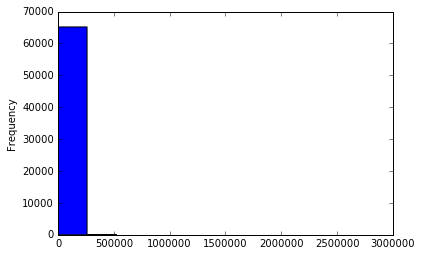

In [31]:
# let's look at some distributions of variables
data['price'].plot(kind='hist')

Hmm. Let's fix two things:
1. Let's plot the logarithm of price. That will make the scale more meaningful.
2. Let's suppress the matplotlib.axes business (it's reflecting the object our plot command returns). We can do this by ending the line with a semicolon.

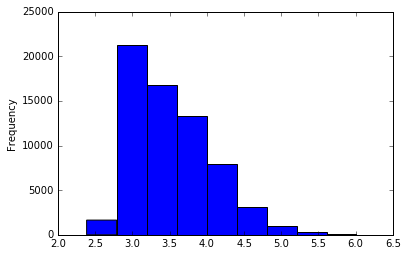

In [32]:
#first, import numpy, which has the logarithm function. We'll also give it a nickname.
import numpy as np

# the apply method applies a function to every element of a data frame (or series in this case)
# we will use this to create a new column in the data frame called log_price
data['log_price'] = data['price'].apply(np.log10)
data['log_price'].plot(kind='hist');

But we can do so much better!

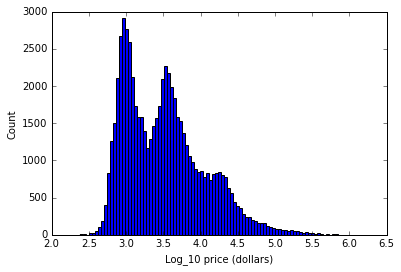

In [33]:
#let's pull out the big guns
import matplotlib.pyplot as plt

data['log_price'].plot(kind='hist', bins=100)
plt.xlabel('Log_10 price (dollars)')
plt.ylabel('Count');

What about other types of plots?

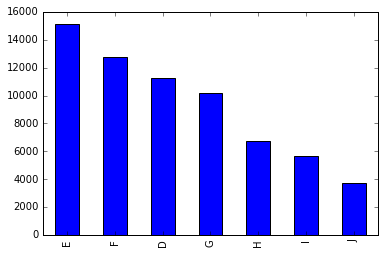

In [34]:
# the value_counts() method counts the number of times each value occurs in the data['color'] series
data['color'].value_counts().plot(kind='bar');

That's a bit ugly. Let's change plot styles.

In [35]:
plt.style.use('ggplot')

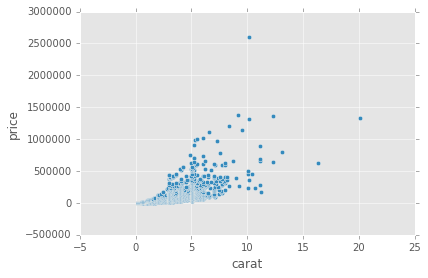

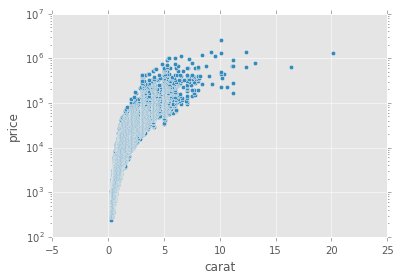

In [36]:
# scatter plot the relationship between carat and price
data.plot(kind='scatter', x='carat', y='price');

# do the same thing, but plot y on a log scale
data.plot(kind='scatter', x='carat', y='price', logy=True);

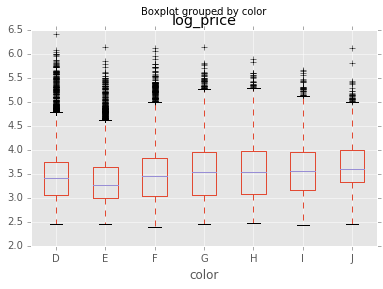

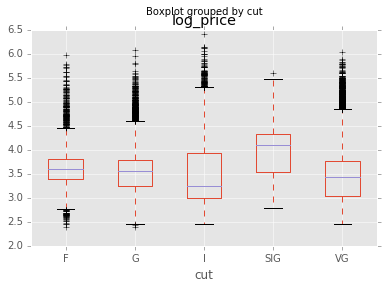

In [37]:
data.boxplot(column='log_price', by='color');
data.boxplot(column='log_price', by='cut');

## Challenge Question:
You can see from the above above that color and cut don't seem to matter much to price. Can you think of a reason why this might be?

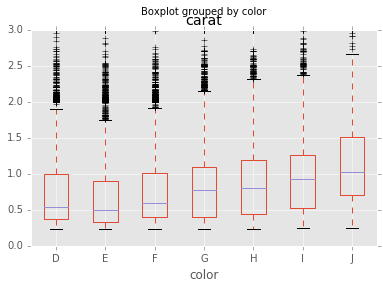

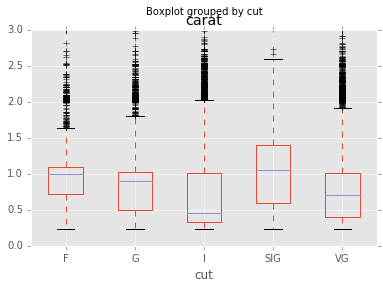

In [38]:
data.boxplot(column='carat', by='color');
plt.ylim(0, 3);
data.boxplot(column='carat', by='cut');
plt.ylim(0, 3);

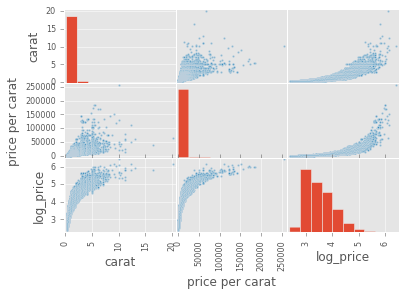

In [39]:
from pandas.plotting import scatter_matrix

column_list = ['carat', 'price per carat', 'log_price']
scatter_matrix(data[column_list]);

# Final thoughts:

There are lots and lots and lots of plotting libraries out there. 
- [Matplotlib](http://matplotlib.org/) is the standard (and most full-featured), but it's built to look and work like Matlab, which is not known for the prettiness of its plots. 
- There is an unofficial port of the excellent [ggplot2](https://ggplot2.tidyverse.org/) library from R to [Python](https://yhat.github.io/ggpy/). It lacks some features, but does follow ggplot's unique "grammar of graphics" approach.
- [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) is what the cool kids seem to be using right now. ggplot-quality results, but with a more Python-y syntax. Focus on good-looking defaults relative to Matplotlib with less typing and swap-in stylesheets to give plots a consistent look and feel.
- [Bokeh](http://bokeh.pydata.org/en/latest/) has a focus on web output and large or streaming datasets.
- [plot.ly](https://plot.ly) has a focus on data sharing and collaboration. May not be best for quick and dirty data exploration, but nice for showing to colleagues.

## Very important:
Plotting is lots of fun to play around with, but almost no plot is going to be of publication quality without some tweaking. Once you pick a package, you will want to spend time learning how to get labels, spacing, tick marks, etc. right. All of the packages above are very powerful, but inevitably, you will want to do something that seems simple and turns out to be hard.

Why not just take the plot that's easy to make and pretty it up in Adobe Illustrator? **Any plot that winds up in a paper will be revised many times in the course of revision and peer review. Learn to let the program do the hard work.** You want code that will get you 90 - 95% of the way to publication quality.

Thankfully, it's very, very easy to learn how to do this. Because plotting routines present such nice visual feedback, there are lots and lots of examples on line with code that will show you how to make gorgeous plots. Here again, documentation and StackOverflow are your friends!

# Case Study 2: Time allocation

Now let's practice some of what we learned by analyzing data from a very simple survey.

I asked members of CCN and Neurobiology to answer the following question:
![survey image](qualtrics.png)

In [ ]:
!wget -P "$target_dir" "https://people.duke.edu/~jmp33/dibs/time_alloc.csv" # download csv to data folder

# if this doesn't work, manually download `time_alloc.csv` from https://people.duke.edu/~jmp33/dibs/ 
# to your local machine, and upload it to `data` folder

In [40]:
dat = pd.read_csv('data/time_alloc.csv')

In [41]:
dat.head()

,Start Date,End Date,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Reference,LocationLatitude - Location Latitude,LocationLongitude - Location Longitude,DistributionChannel - Distribution Channel,Q1_1 - Experimental design,Q1_2 - Piloting,Q1_3 - Data collection,Q1_4 - Data analysis,Q1_5 - Writing results,Q1_6 - Review process
0,8/30/16 10:41,8/30/16 10:43,100,82,True,8/30/16 10:43,R_1kO0775KprWgA91,NaN,NaN,NaN,NaN,35.995407,-78.901901,anonymous,5,5,40,30,10,10
1,8/30/16 8:42,8/30/16 8:44,100,99,True,8/30/16 8:44,R_2P4C0IepjotM86v,NaN,NaN,NaN,NaN,52.516693,13.399994,anonymous,12,4,24,38,16,6
2,8/30/16 4:47,8/30/16 4:51,100,252,True,8/30/16 4:51,R_6gGZesX5RTFq0Mh,NaN,NaN,NaN,NaN,52.516693,13.399994,anonymous,11,10,7,59,10,3
3,8/29/16 19:23,8/29/16 19:26,100,161,True,8/29/16 19:26,R_3iCkovXNWsaIlmc,NaN,NaN,NaN,NaN,35.946594,-78.797699,anonymous,20,10,20,20,20,10
4,8/29/16 18:13,8/29/16 18:15,100,105,True,8/29/16 18:15,R_1I5jOg0c96ZUMsH,NaN,NaN,NaN,NaN,35.995407,-78.901901,anonymous,40,25,10,10,10,5


In [42]:
dat.columns

Index(['Start Date', 'End Date', 'Progress', 'Duration (in seconds)',
       'Finished', 'Recorded Date', 'Response ID', 'Recipient Last Name',
       'Recipient First Name', 'Recipient Email', 'External Reference',
       'LocationLatitude - Location Latitude',
       'LocationLongitude - Location Longitude',
       'DistributionChannel - Distribution Channel',
       'Q1_1 - Experimental design', 'Q1_2 - Piloting',
       'Q1_3 - Data collection', 'Q1_4 - Data analysis',
       'Q1_5 - Writing results', 'Q1_6 - Review process'],
      dtype='object')

In [43]:
dat.shape

(96, 20)

Let's just pull out the data we care about, the columns that start with ```'Q1_'```:

In [44]:
cols_to_extract = [c for c in dat.columns if 'Q1_' in c]
print(cols_to_extract)

['Q1_1 - Experimental design', 'Q1_2 - Piloting', 'Q1_3 - Data collection', 'Q1_4 - Data analysis', 'Q1_5 - Writing results', 'Q1_6 - Review process']


Now we want to shorten the column names to just the descriptive part:

In [45]:
col_names = [n.split(' - ')[-1] for n in cols_to_extract]
print(col_names)

['Experimental design', 'Piloting', 'Data collection', 'Data analysis', 'Writing results', 'Review process']


Finally, make a reduced dataset in which we drop the first row and get the columns we want. Set the column name to the 
description we extracted:

In [46]:
dat_red = dat[cols_to_extract]
dat_red.columns = col_names
dat_red.head()

,Experimental design,Piloting,Data collection,Data analysis,Writing results,Review process
0,5,5,40,30,10,10
1,12,4,24,38,16,6
2,11,10,7,59,10,3
3,20,10,20,20,20,10
4,40,25,10,10,10,5


Now, we can figure out the average percent time allocated to each aspect of a project:

In [47]:
dat_red.mean()

Experimental design    14.500000
Piloting               10.729167
Data collection        25.239583
Data analysis          26.135417
Writing results        14.197917
Review process          9.197917
dtype: float64

And we can visualize this with a box plot:

In [48]:
import seaborn as sns

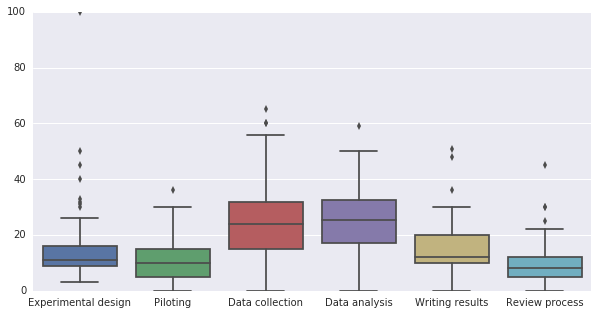

In [49]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=dat_red)

(0, 100)

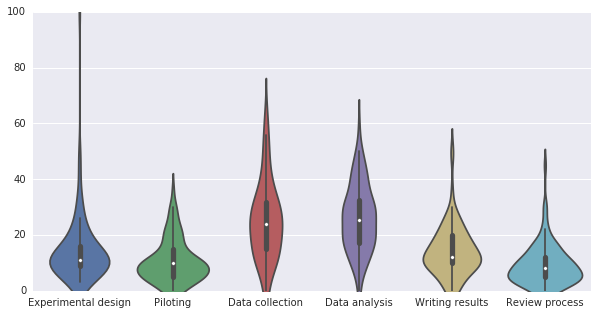

In [50]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=dat_red)
plt.ylim([0, 100])

And we might want to know how these covary (bearing in mind that the values have to sum to 100):

In [51]:
dat_red.corr()

,Experimental design,Piloting,Data collection,Data analysis,Writing results,Review process
Experimental design,1.000000,-0.057772,-0.394450,-0.418189,-0.149596,-0.007290
Piloting,-0.057772,1.000000,-0.116101,-0.062659,-0.332602,-0.215466
Data collection,-0.394450,-0.116101,1.000000,-0.181762,-0.395939,-0.344578
Data analysis,-0.418189,-0.062659,-0.181762,1.000000,-0.146576,-0.340260
Writing results,-0.149596,-0.332602,-0.395939,-0.146576,1.000000,0.375177
Review process,-0.007290,-0.215466,-0.344578,-0.340260,0.375177,1.000000
